# Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ratings = pd.read_csv('Ratings.csv')
books = pd.read_csv('Books.csv')

C:\Users\user\AppData\Local\Temp\ipykernel_28880\1002755648.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('Books.csv')


In [3]:
ratings

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [4]:
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [5]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [6]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [7]:
books.drop(columns = ['Image-URL-S', 'Image-URL-L'], inplace = True)

In [8]:
books[(books['Book-Author'].isnull()) | (books['Publisher'].isnull())]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M
118033,0751352497,A+ Quiz Masters:01 Earth,NaN,1999,Dorling Kindersley,http://images.amazon.com/images/P/0751352497.0...
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...


In [9]:
ratings[(ratings['ISBN'] =='0751352497') | (ratings['ISBN'] =='193169656X') | (ratings['ISBN'] =='1931696993') | (ratings['ISBN'] =='9627982032')]

,User-ID,ISBN,Book-Rating
273117,63714,0751352497,10
411773,98391,193169656X,9
411782,98391,1931696993,9
412805,98647,9627982032,8


In [10]:
ratings = ratings[~((ratings['ISBN'] =='0751352497') | (ratings['ISBN'] =='193169656X') | (ratings['ISBN'] =='1931696993') | (ratings['ISBN'] =='9627982032'))]

In [11]:
books.dropna(subset=['Book-Author', 'Publisher'], inplace = True)

In [12]:
books_ratings = books.merge(ratings, on='ISBN')

In [13]:
books_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031132 entries, 0 to 1031131
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   ISBN                 1031132 non-null  object
 1   Book-Title           1031132 non-null  object
 2   Book-Author          1031132 non-null  object
 3   Year-Of-Publication  1031132 non-null  object
 4   Publisher            1031132 non-null  object
 5   Image-URL-M          1031132 non-null  object
 6   User-ID              1031132 non-null  int64 
 7   Book-Rating          1031132 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 62.9+ MB


In [14]:
books_ratings.head(1)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,2,0


Text(0.5, 1.0, 'Distribution of Ratings')

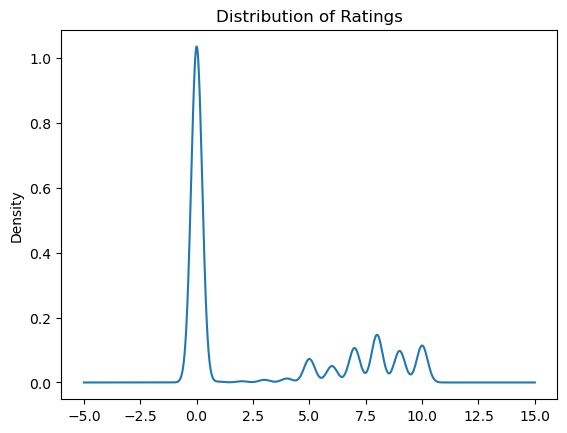

In [88]:
books_ratings['Book-Rating'].plot(kind = 'kde')
plt.title('Distribution of Ratings')

# Popular Recommendations

In [29]:
num_of_ratings = books_ratings.groupby('Book-Title').count()['Book-Rating']
num_of_ratings = num_of_ratings.reset_index()
num_of_ratings.rename(columns = {'Book-Rating':'rating_count'}, inplace = True)

In [30]:
mean_of_ratings = books_ratings.groupby('Book-Title').agg({'Book-Rating':'mean'})
mean_of_ratings = mean_of_ratings.reset_index()
mean_of_ratings.rename(columns = {'Book-Rating':'mean_rating'}, inplace = True)

In [34]:
num_of_ratings

,Book-Title,rating_count
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241063,Ã?Â?lpiraten.,2
241064,Ã?Â?rger mit Produkt X. Roman.,4
241065,Ã?Â?sterlich leben.,1
241066,Ã?Â?stlich der Berge.,3


In [35]:
mean_of_ratings

,Book-Title,mean_rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241063,Ã?Â?lpiraten.,0.000000
241064,Ã?Â?rger mit Produkt X. Roman.,5.250000
241065,Ã?Â?sterlich leben.,7.000000
241066,Ã?Â?stlich der Berge.,2.666667


In [36]:
mean_of_ratings.duplicated().sum()

0

In [64]:
df = num_of_ratings.merge(mean_of_ratings, on = 'Book-Title')

In [65]:
df

,Book-Title,rating_count,mean_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241063,Ã?Â?lpiraten.,2,0.000000
241064,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241065,Ã?Â?sterlich leben.,1,7.000000
241066,Ã?Â?stlich der Berge.,3,2.666667


In [66]:
popular_books = df[df['rating_count'] > 200]

In [67]:
popular_books = popular_books.reset_index()

In [68]:
popular_books.drop(columns = 'index', inplace = True)

In [69]:
popular_books = popular_books.merge(books, on = 'Book-Title')

In [70]:
popular_books.drop_duplicates(subset = 'Book-Title', inplace = True)

In [71]:
popular_books = popular_books[popular_books['mean_rating'] > 4]

In [72]:
popular_books = popular_books.sort_values('mean_rating', ascending = False)

In [73]:
popular_books = popular_books.reset_index().drop(columns = 'index')

In [74]:
popular_books

,Book-Title,rating_count,mean_rating,ISBN,Book-Author,Year-Of-Publication,Publisher,Image-URL-M
0,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804,0439136350,J. K. Rowling,1999,Scholastic,http://images.amazon.com/images/P/0439136350.0...
1,Harry Potter and the Goblet of Fire (Book 4),387,5.824289,0439139597,J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439139597.0...
2,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410,0590353403,J. K. Rowling,1998,Scholastic,http://images.amazon.com/images/P/0590353403.0...
3,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441,043935806X,J. K. Rowling,2003,Scholastic,http://images.amazon.com/images/P/043935806X.0...
4,Ender's Game (Ender Wiggins Saga (Paperback)),249,5.409639,0312853238,Orson Scott Card,1992,Tor Books,http://images.amazon.com/images/P/0312853238.0...
5,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453,0439064872,J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439064872.0...
6,The Hobbit : The Enchanting Prelude to The Lor...,281,5.007117,0345339681,J.R.R. TOLKIEN,1986,Del Rey,http://images.amazon.com/images/P/0345339681.0...
7,The Fellowship of the Ring (The Lord of the Ri...,368,4.948370,0345339703,J.R.R. TOLKIEN,1986,Del Rey,http://images.amazon.com/images/P/0345339703.0...
8,Harry Potter and the Sorcerer's Stone (Harry P...,575,4.895652,059035342X,J. K. Rowling,1999,Arthur A. Levine Books,http://images.amazon.com/images/P/059035342X.0...
9,"The Two Towers (The Lord of the Rings, Part 2)",260,4.880769,0345339711,J.R.R. TOLKIEN,1986,Del Rey,http://images.amazon.com/images/P/0345339711.0...


In [78]:
popular_books['Book-Author'].value_counts()

Book-Author
J. K. Rowling          6
J.R.R. TOLKIEN         4
George Orwell          2
Neil Gaiman            2
Barbara Kingsolver     2
Jennifer Weiner        1
Nick Hornby            1
Frank McCourt          1
Dave Pelzer            1
Eric Schlosser         1
Ray Bradbury           1
JOHN GRISHAM           1
Yann Martel            1
LAURA HILLENBRAND      1
Billie Letts           1
James McBride          1
PHILIP PULLMAN         1
DIANA GABALDON         1
Elie Wiesel            1
Tracy Chevalier        1
Bill Bryson            1
Benjamin Hoff          1
Jon Krakauer           1
Orson Scott Card       1
Barbara Ehrenreich     1
Douglas Adams          1
Aldous Huxley          1
Anita Diamant          1
MITCH ALBOM            1
Michael Moore          1
Sue Monk Kidd          1
F. Scott Fitzgerald    1
Alice Sebold           1
J.D. Salinger          1
Mitch Albom            1
Dan Brown              1
Harper Lee             1
Tim Lahaye             1
Name: count, dtype: int64

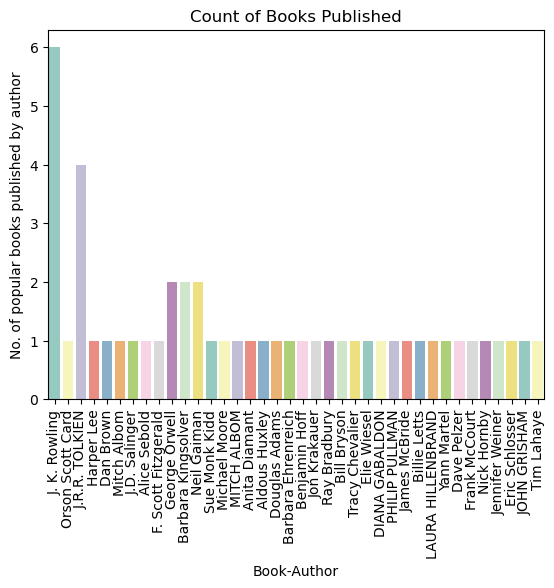

In [87]:
sns.countplot(x='Book-Author', data=popular_books, palette='Set3')
plt.xticks(rotation = 90)
plt.ylabel('No. of popular books published by author')
plt.title('Count of Books Published')
plt.show()

# Collaborative Filtering

In [31]:
books_ratings

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,41385,0
...,...,...,...,...,...,...,...,...
1031127,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,276463,7
1031128,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,276579,4
1031129,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,276680,0
1031130,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,276680,0


In [32]:
user_ratings = books_ratings.groupby('User-ID').count()['Book-Rating']

In [33]:
user_ratings = user_ratings.reset_index()

In [34]:
important_users = user_ratings[user_ratings['Book-Rating'] >= 200]

In [35]:
important_users

,User-ID,Book-Rating
87,254,300
698,2276,456
862,2766,269
919,2977,227
1033,3363,890
...,...,...
90587,274308,1293
91112,275970,1325
91564,277427,490
91639,277639,265


In [36]:
users = important_users['User-ID'].values

In [37]:
books_ratings = books_ratings[books_ratings['User-ID'].isin(users)]

In [38]:
no_of_ratings = books_ratings.groupby('Book-Title').count()['Book-Rating']

In [39]:
no_of_ratings = no_of_ratings.reset_index()

In [40]:
no_of_ratings = no_of_ratings[no_of_ratings['Book-Rating'] >= 50]

In [41]:
books = no_of_ratings['Book-Title'].to_list()
books

['1984',
 '1st to Die: A Novel',
 '2nd Chance',
 '4 Blondes',
 'A Bend in the Road',
 'A Case of Need',
 'A Child Called \\It\\": One Child\'s Courage to Survive"',
 'A Civil Action',
 'A Day Late and a Dollar Short',
 'A Fine Balance',
 'A Great Deliverance',
 'A Heartbreaking Work of Staggering Genius',
 'A Is for Alibi (Kinsey Millhone Mysteries (Paperback))',
 'A Lesson Before Dying (Vintage Contemporaries (Paperback))',
 'A Man Named Dave: A Story of Triumph and Forgiveness',
 'A Man in Full',
 'A Map of the World',
 'A Painted House',
 'A Patchwork Planet',
 'A Prayer for Owen Meany',
 'A Thin Dark Line (Mysteries &amp; Horror)',
 "A Thousand Acres (Ballantine Reader's Circle)",
 'A Time to Kill',
 "A Virtuous Woman (Oprah's Book Club (Paperback))",
 'A Walk to Remember',
 'A Widow for One Year',
 'A Wrinkle In Time',
 'A Wrinkle in Time',
 'A Year in Provence',
 "ANGELA'S ASHES",
 'About a Boy',
 'Absolute Power',
 'Acceptable Risk',
 'Accident',
 'Airframe',
 'All Around the To

In [42]:
books_ratings = books_ratings[books_ratings['Book-Title'].isin(books)]

In [43]:
books_ratings.groupby('User-ID').count()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M,Book-Rating
User-ID,,,,,,,
254,63,63,63,63,63,63,63
2276,30,30,30,30,30,30,30
2766,46,46,46,46,46,46,46
2977,19,19,19,19,19,19,19
3363,83,83,83,83,83,83,83
...,...,...,...,...,...,...,...
274308,135,135,135,135,135,135,135
275970,92,92,92,92,92,92,92
277427,98,98,98,98,98,98,98


In [44]:
pt = books_ratings.pivot_table(index = 'Book-Title', columns = 'User-ID', values = 'Book-Rating')

In [45]:
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Bend in the Road,0.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,9.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [46]:
pt = pt.fillna(0)

In [47]:
from sklearn.metrics.pairwise import cosine_similarity

In [48]:
similarity_scores = cosine_similarity(pt)

In [49]:
similarity_scores.shape

(707, 707)

In [50]:
similarity_scores[0]

array([1.        , 0.0999137 , 0.01189468, 0.        , 0.05229234,
       0.02703559, 0.08005247, 0.133798  , 0.03177829, 0.03573298,
       0.0226271 , 0.06592522, 0.020304  , 0.09425025, 0.1304464 ,
       0.08089641, 0.10866788, 0.0496928 , 0.02453052, 0.11405415,
       0.        , 0.13965274, 0.07645776, 0.05992325, 0.08499677,
       0.        , 0.06829594, 0.13307519, 0.07404925, 0.11854319,
       0.007483  , 0.01435345, 0.        , 0.07761015, 0.04406341,
       0.0151626 , 0.09251799, 0.01776199, 0.02543351, 0.07778745,
       0.11379679, 0.0554492 , 0.08139372, 0.08254087, 0.08560054,
       0.05350252, 0.0534403 , 0.26331669, 0.09527704, 0.05861375,
       0.08728505, 0.06575169, 0.        , 0.04353225, 0.01871487,
       0.        , 0.05484345, 0.00531237, 0.07674541, 0.05085288,
       0.18422052, 0.        , 0.01208759, 0.0290784 , 0.04169477,
       0.12354122, 0.16140808, 0.        , 0.1301383 , 0.06445396,
       0.        , 0.        , 0.        , 0.10686088, 0.02734

In [51]:
book_name= list(pt.index)
idx = book_name.index('Zoya')
idx

705

In [52]:
for i in range(5):
    print(sorted(list(enumerate(similarity_scores[0])), key=lambda x: x[1], reverse = True)[1:6][i][0])

47
546
82
635
552


In [53]:
pt.index[4]

'A Bend in the Road'

In [54]:
books_ratings[books_ratings['Book-Title'] == 'A Bend in the Road']['Book-Author'].unique()[0]

'Nicholas Sparks'

In [55]:
def recommend(book_title):
    book_name= list(pt.index)
    idx = book_name.index(book_title) 
    for i in range(5):
        a = sorted(list(enumerate(similarity_scores[idx])), key=lambda x: x[1], reverse = True)[1:6][i][0]
        print('Book Name: ', pt.index[a])
        print('Book Author: ', books_ratings[books_ratings['Book-Title'] == pt.index[a]]['Book-Author'].unique()[0])
        print('Book Image: ', books_ratings[books_ratings['Book-Title'] == pt.index[a]]['Image-URL-M'].unique()[0])
        print('\n')

In [64]:
recommend('Accident')

Book Name:  Daddy
Book Author:  DANIELLE STEEL
Book Image:  http://images.amazon.com/images/P/0440207622.01.MZZZZZZZ.jpg


Book Name:  Vanished
Book Author:  Danielle Steel
Book Image:  http://images.amazon.com/images/P/0385306032.01.MZZZZZZZ.jpg


Book Name:  Fine Things
Book Author:  Danielle Steel
Book Image:  http://images.amazon.com/images/P/0440200563.01.MZZZZZZZ.jpg


Book Name:  Wifey
Book Author:  Judy Blume
Book Image:  http://images.amazon.com/images/P/0671693816.01.MZZZZZZZ.jpg


Book Name:  Wanderlust
Book Author:  Danielle Steel
Book Image:  http://images.amazon.com/images/P/0440193613.01.MZZZZZZZ.jpg




In [65]:
books_ratings[books_ratings['Book-Title'] == 'Accident']['Book-Author']

263497    Danielle Steel
263499    Danielle Steel
263500    Danielle Steel
263501    Danielle Steel
263502    Danielle Steel
               ...      
405053    Danielle Steel
405056    Danielle Steel
405058    Danielle Steel
405059    Danielle Steel
869085    Danielle Steel
Name: Book-Author, Length: 64, dtype: object

#### import pickle

In [61]:
books_ratings_dict = books_ratings.to_dict()
popular_books_dict = popular_books.to_dict()

In [62]:
pickle.dump(similarity_scores, open('similarity_scores.pkl', 'wb'))
pickle.dump(pt, open('pt.pkl', 'wb'))
pickle.dump(books_ratings_dict, open('books_ratings_dict.pkl', 'wb'))
pickle.dump(popular_books_dict, open('popular_books_dict.pkl', 'wb'))